In [2]:
! rmdir /notebooks/data7cls_randomsplit/validation/.ipynb_checkpoints

rmdir: failed to remove '/notebooks/data7cls_randomsplit/validation/.ipynb_checkpoints': No such file or directory


### Re-run from here!

In [5]:

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [8]:
# input path for the images

base_path = '/notebooks/data7cls_randomsplit/'

In [7]:
for expression in os.listdir(base_path + "train/"):
    print (expression)

distracted
sad
confused
angry
surprise
happy
neutral


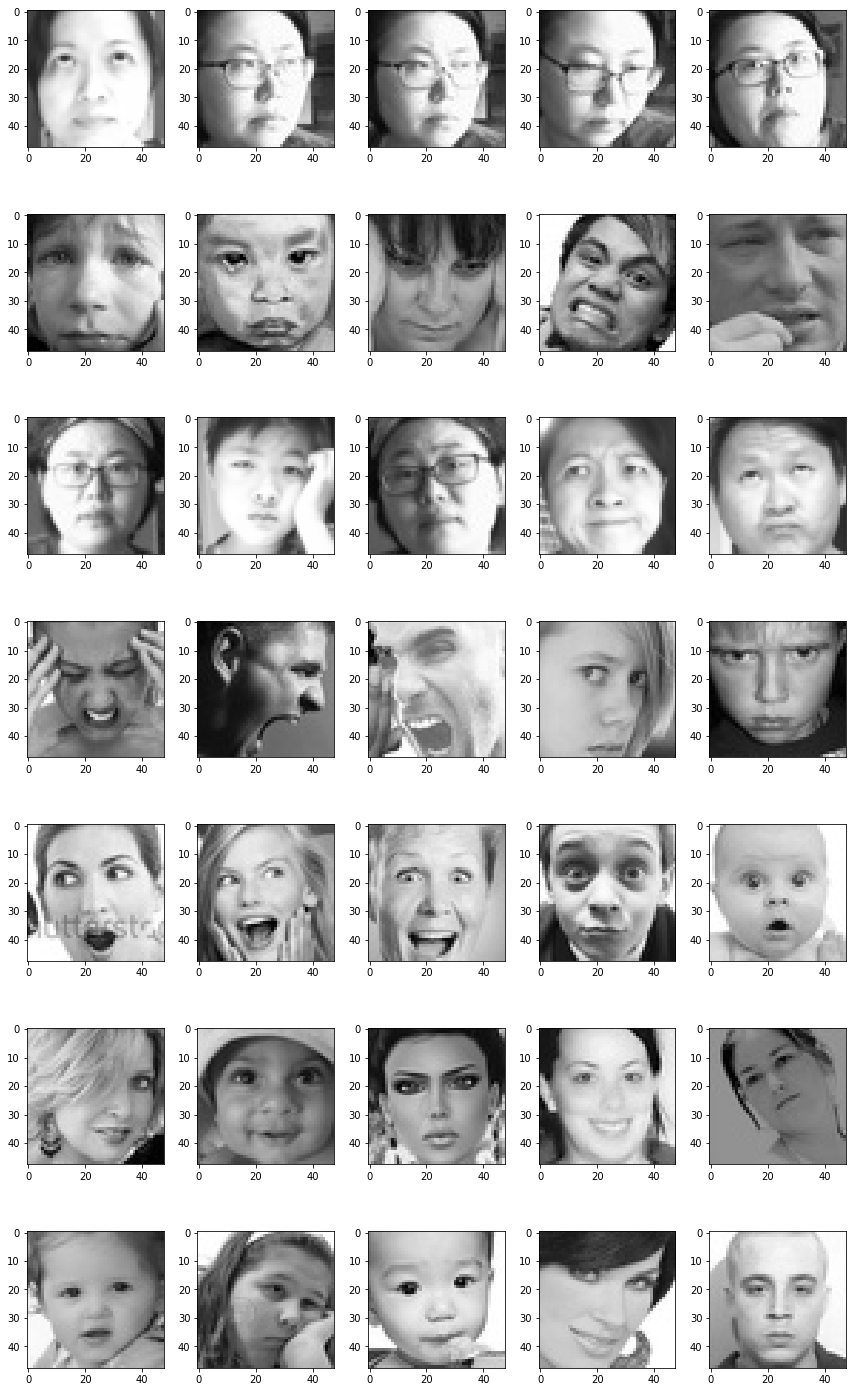

In [9]:
# display some images for every different expression

# size of the image: 48*48 pixels
pic_size = 48



plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [10]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")


522 distracted images
4938 sad images
643 confused images
3993 angry images
3205 surprise images
7164 happy images
4982 neutral images


In [11]:
# count number of validation images for each expression

for expression in os.listdir(base_path + "validation"):
    print(str(len(os.listdir(base_path + "validation/" + expression))) + " " + expression + " images")

132 distracted images
1139 sad images
169 confused images
960 angry images
797 surprise images
1825 happy images
1216 neutral images


In [12]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 25446 images belonging to 7 classes.
Found 6236 images belonging to 7 classes.


In [13]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
%%time

# number of epochs to train the NN
epochs = 150

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights_7c_150e.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
198/198 [==============================] - 935s 5s/step - loss: 1.8712 - acc: 0.2741 - val_loss: 1.5048 - val_acc: 0.3877

Epoch 00001: val_acc improved from -inf to 0.38770, saving model to model_weights_7c_150e.h5
Epoch 2/150
198/198 [==============================] - 919s 5s/step - loss: 1.5999 - acc: 0.3618 - val_loss: 1.4630 - val_acc: 0.4145

Epoch 00002: val_acc improved from 0.38770 to 0.41454, saving model to model_weights_7c_150e.h5
Epoch 3/150
198/198 [==============================] - 917s 5s/step - loss: 1.4745 - acc: 0.4117 - val_loss: 1.4457 - val_acc: 0.4299

Epoch 00003: val_acc improved from 0.41454 to 0.42993, saving model to model_weights_7c_150e.h5
Epoch 4/150
198/198 [==============================] - 946s 5s/step - loss: 1.3897 - acc: 0.4423 - val_loss: 1.4274 - val_acc: 0.4512

Epoch 00004: val_acc improved from 0.42993 to 0.45121, saving model to model_weights_7c_150e.h5
Epoch 5/150
198/198 [==========

198/198 [==============================] - 490s 2s/step - loss: 0.5977 - acc: 0.7692 - val_loss: 0.8076 - val_acc: 0.7012

Epoch 00038: val_acc did not improve from 0.70907
Epoch 39/150
198/198 [==============================] - 490s 2s/step - loss: 0.6006 - acc: 0.7696 - val_loss: 0.7836 - val_acc: 0.7174

Epoch 00039: val_acc improved from 0.70907 to 0.71742, saving model to model_weights_7c_150e.h5
Epoch 40/150
198/198 [==============================] - 490s 2s/step - loss: 0.5795 - acc: 0.7773 - val_loss: 0.8161 - val_acc: 0.7089

Epoch 00040: val_acc did not improve from 0.71742
Epoch 41/150
198/198 [==============================] - 490s 2s/step - loss: 0.5637 - acc: 0.7835 - val_loss: 0.8081 - val_acc: 0.7145

Epoch 00041: val_acc did not improve from 0.71742
Epoch 42/150
198/198 [==============================] - 491s 2s/step - loss: 0.5525 - acc: 0.7882 - val_loss: 0.7974 - val_acc: 0.7151

Epoch 00042: val_acc did not improve from 0.71742
Epoch 43/150
198/198 [===============

198/198 [==============================] - 844s 4s/step - loss: 0.2320 - acc: 0.9139 - val_loss: 1.0127 - val_acc: 0.7177

Epoch 00081: val_acc did not improve from 0.73314
Epoch 82/150
198/198 [==============================] - 845s 4s/step - loss: 0.2238 - acc: 0.9169 - val_loss: 0.9777 - val_acc: 0.7258

Epoch 00082: val_acc did not improve from 0.73314
Epoch 83/150
198/198 [==============================] - 598s 3s/step - loss: 0.2152 - acc: 0.9200 - val_loss: 1.0199 - val_acc: 0.7176

Epoch 00083: val_acc did not improve from 0.73314
Epoch 84/150
198/198 [==============================] - 486s 2s/step - loss: 0.2221 - acc: 0.9188 - val_loss: 1.0318 - val_acc: 0.7179

Epoch 00084: val_acc did not improve from 0.73314
Epoch 85/150
198/198 [==============================] - 487s 2s/step - loss: 0.2158 - acc: 0.9211 - val_loss: 1.0781 - val_acc: 0.7181

Epoch 00085: val_acc did not improve from 0.73314
Epoch 86/150
198/198 [==============================] - 487s 2s/step - loss: 0.2085

198/198 [==============================] - 487s 2s/step - loss: 0.1068 - acc: 0.9613 - val_loss: 1.2294 - val_acc: 0.7241

Epoch 00125: val_acc did not improve from 0.73428
Epoch 126/150
198/198 [==============================] - 487s 2s/step - loss: 0.1037 - acc: 0.9635 - val_loss: 1.3196 - val_acc: 0.7092

Epoch 00126: val_acc did not improve from 0.73428
Epoch 127/150
198/198 [==============================] - 487s 2s/step - loss: 0.1092 - acc: 0.9609 - val_loss: 1.2691 - val_acc: 0.7174

Epoch 00127: val_acc did not improve from 0.73428
Epoch 128/150
198/198 [==============================] - 488s 2s/step - loss: 0.1039 - acc: 0.9621 - val_loss: 1.2945 - val_acc: 0.7173

Epoch 00128: val_acc did not improve from 0.73428
Epoch 129/150
198/198 [==============================] - 487s 2s/step - loss: 0.0973 - acc: 0.9655 - val_loss: 1.3013 - val_acc: 0.7177

Epoch 00129: val_acc did not improve from 0.73428
Epoch 130/150
198/198 [==============================] - 487s 2s/step - loss: 0

In [15]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model_7c_150e.json", "w") as json_file:
    json_file.write(model_json)

## Analyze the result

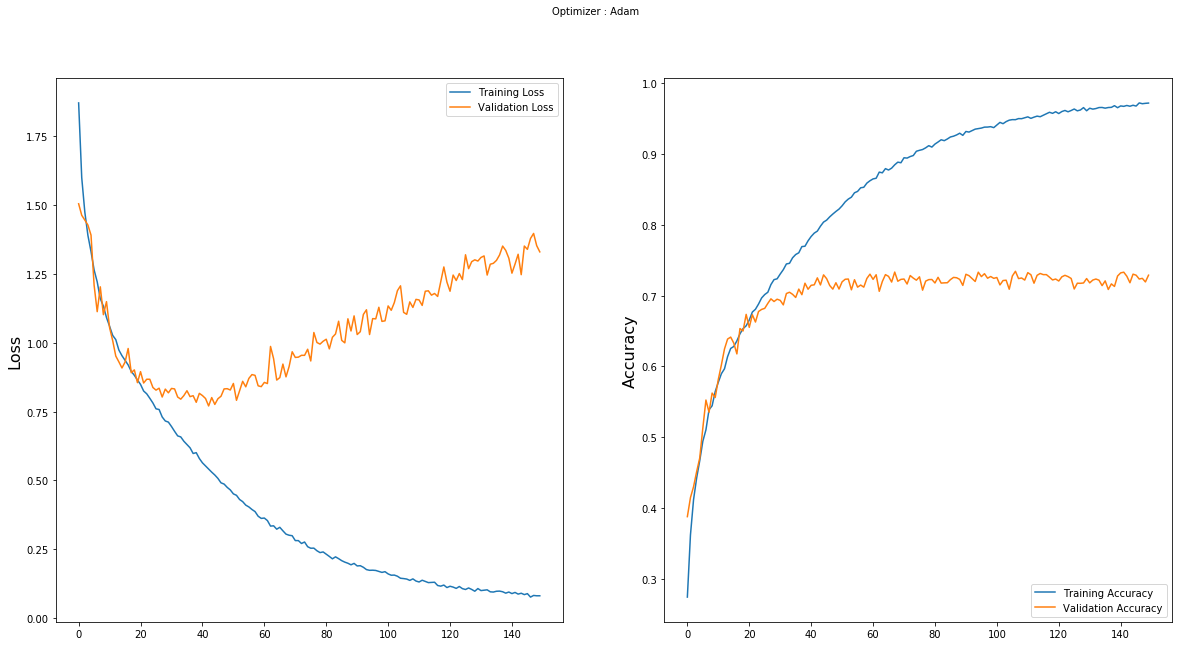

In [16]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


## Confusion Matrix

In [28]:
validation_generator.n

6229

In [29]:
validation_generator.batch_size

128

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

steps = validation_generator.n//validation_generator.batch_size+1
predictions = model.predict_generator(generator=validation_generator, steps=steps)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes

cnf_matrix = confusion_matrix(y_test, y_pred)

cnf_matrix

array([[ 38,   0,   0,  66,  55, 145, 656],
       [ 86,   0,   1,  15,  18,  18,  30],
       [ 81,   0,   0,  10,  14,  21,   5],
       [424, 168, 132, 802, 121, 132,  46],
       [ 42,   1,   1, 894, 168,  76,  34],
       [100,   1,   2, 139, 624, 233,  40],
       [ 93,   2,   1,  71, 128, 476,  26]])

In [23]:
print(validation_generator.class_indices)

{'distracted': 2, 'surprise': 6, 'sad': 5, 'happy': 3, 'neutral': 4, 'angry': 0, 'confused': 1}


In [24]:
print(train_generator.class_indices)

{'distracted': 2, 'surprise': 6, 'sad': 5, 'happy': 3, 'neutral': 4, 'angry': 0, 'confused': 1}


In [25]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       angry       0.04      0.04      0.04       960
    confused       0.00      0.00      0.00       168
  distracted       0.00      0.00      0.00       131
       happy       0.40      0.44      0.42      1825
     neutral       0.15      0.14      0.14      1216
         sad       0.21      0.20      0.21      1139
    surprise       0.03      0.03      0.03       797

    accuracy                           0.20      6236
   macro avg       0.12      0.12      0.12      6236
weighted avg       0.20      0.20      0.20      6236



<Figure size 432x288 with 0 Axes>

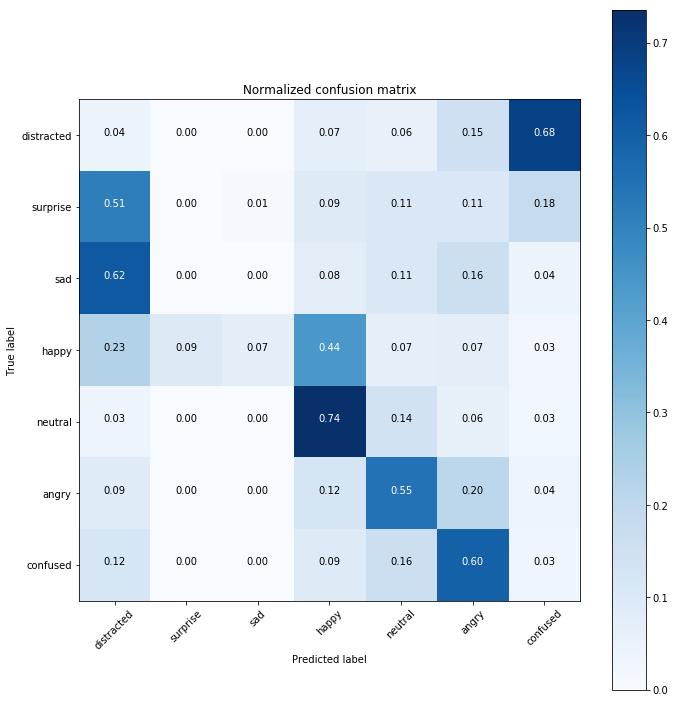

In [26]:
# show the confusion matrix of our predictions

# compute predictions
# predictions = model.predict_generator(generator=validation_generator, steps=57.484375)
# y_pred = [np.argmax(probas) for probas in predictions]
# y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()